Practice at Python: Explorando Fundamentos and Realce of Images Medical

Objective: Aplicar and modificar techniques of processing digital of images to entender its impacto visual and conceitual at images medical.

Ferramentas: Python with the libraries numpy, matplotlib, scikit-image and scipy.

1. Execute each bloco of code fornecido.
2. Observe atentamente the images and graphs gerados.
3. Realize the modifications sugeridas at each tarefa.
4. Discuta at grupo what aconteceu and por that aconteceu, relacionando with the conceitos theoretical.


Configureção Inicial and Introduction

Vamos startsr carregando the libraries necessary and a image medical of example. We will use a fatia of a exame of resonance magnetic of the brain, disponibilizada by the scikit-image.

Imagem 'brain' (fatia 5) carregada.


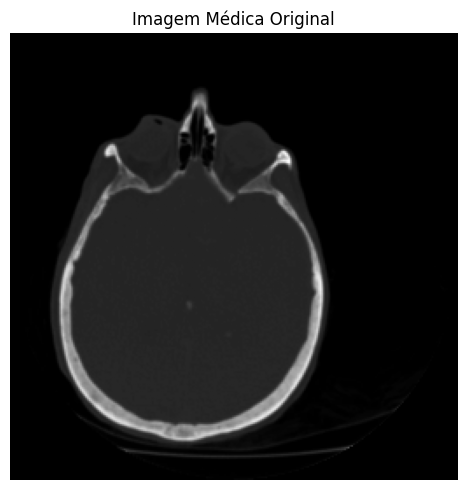

In [ ]:
# --- Imports Necessary ---
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float, img_as_ubyte, transform, exposure, util, filters, morphology
from scipy import ndimage
from numpy.fft import fft2, ifft2, fftshift, ifftshift
import time
import cv2 # To desenhar círculos in the Tarefa 1.3

# --- Function Auxiliar to Plotar Múltiplas Images ---
def plot_images(images, titles, cmaps=None, rows=1, cols=None, figsize=(15,5)):
    num_images = len(images)
    if cols is None:
        cols = (num_images + rows - 1) // rows

    fig, axes = plt.subplots(rows, cols, figsize=figsize, squeeze=False) # squeeze=False garante that axes is always 2D

    axes_flat = axes.ravel()

    if cmaps is None:
        cmaps_list = ['gray'] * num_images
    elif isinstance(cmaps, str):
        cmaps_list = [cmaps] * num_images
    else:
        cmaps_list = list(cmaps)
        if len(cmaps_list) < num_images:
            cmaps_list.extend(['gray'] * (num_images - len(cmaps_list)))

    for i in range(len(axes_flat)):
        if i < num_images:
            img = images[i]
            title = titles[i]
            current_cmap = cmaps_list[i]

            axes_flat[i].imshow(img, cmap=current_cmap if img.ndim == 2 else None)
            axes_flat[i].set_title(title)
            axes_flat[i].axis('off')
        else:
            axes_flat[i].axis('off') # Desliga eixos extras

    plt.tight_layout()
    plt.show()

# --- Carregar Image Medical ---
try:
    brain_volume = data.brain()
    if brain_volume.ndim == 3:
        slice_index = brain_volume.shape[0] // 2
        image_gray_orig = brain_volume[slice_index, :, :]
    elif brain_volume.ndim == 2:
        image_gray_orig = brain_volume
        slice_index = "N/A (Imagem 2D)"
    else:
        raise ValueError("Formato de imagem 'brain' não esperado.")
    print(f"Imagem 'brain' (fatia {slice_index if brain_volume.ndim == 3 else ''}) carregada.")
except Exception as e:
    print(f"Erro ao carregar 'brain': {e}. Usando 'camera' como fallback.")
    image_gray_orig = data.camera()

image_float_g = img_as_float(image_gray_orig.copy())
image_ubyte_g = img_as_ubyte(image_gray_orig.copy())
M_g, N_g = image_float_g.shape

# Visualizar a image original
plot_images([image_ubyte_g], ["Imagem Médica Original"], cmaps=['gray'])

Bloco 1: Fundamentos of the Image Digital and Perception Visual (Cap. 1 and 2)

Conceito: Resolution Espacial and of Intensidade.


--- Tarefa 1.1: Resolução Espacial ---


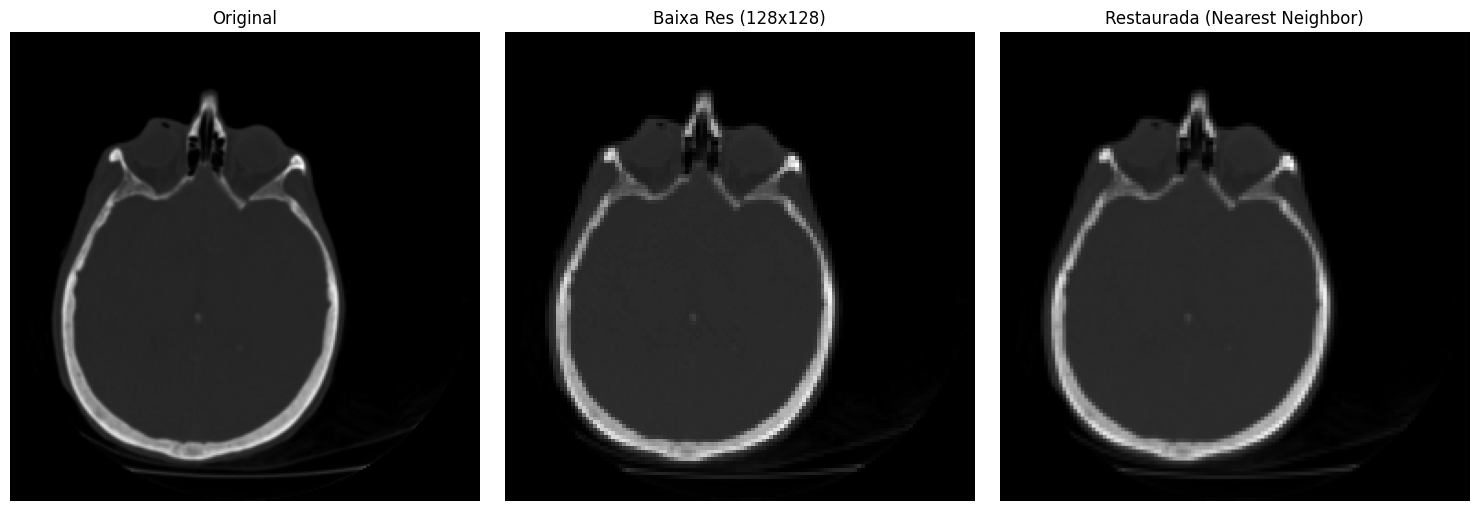

In [ ]:
# --- Tarefa 1.1: Resolution Espacial ---
print("\n--- Tarefa 1.1: Resolução Espacial ---")
res_metade_altura = M_g // 2
res_metade_largura = N_g // 2
image_baixa_res = transform.resize(image_float_g,
                                   (res_metade_altura, res_metade_largura),
                                   anti_aliasing=True)
image_restaurada_nn = transform.resize(image_baixa_res, (M_g, N_g), order=0, anti_aliasing=False)

plot_images([image_float_g, image_baixa_res, image_restaurada_nn],
            ["Original", f"Baixa Res ({res_metade_altura}x{res_metade_largura})", "Restaurada (Nearest Neighbor)"],
            cmaps=['gray', 'gray', 'gray'])

Modifications and Perguntas (Tarefa 1.1):

1. Altere o redimensionamento at `image_baixa_res` to 1/4 and after 1/8 of the dimensions originais. What acontece with the detalhes of the image?

2. `in the image_restaurada_nn`, altere o tometer `order` of the function `transform.resize` to `1` (Bilinear) and after to `3` (Bicubic). Which method of interpolation parece melhor to restaurar a image and por what? Observe the edges and a suavidade.


--- Tarefa 1.2: Resolução de Intensidade ---


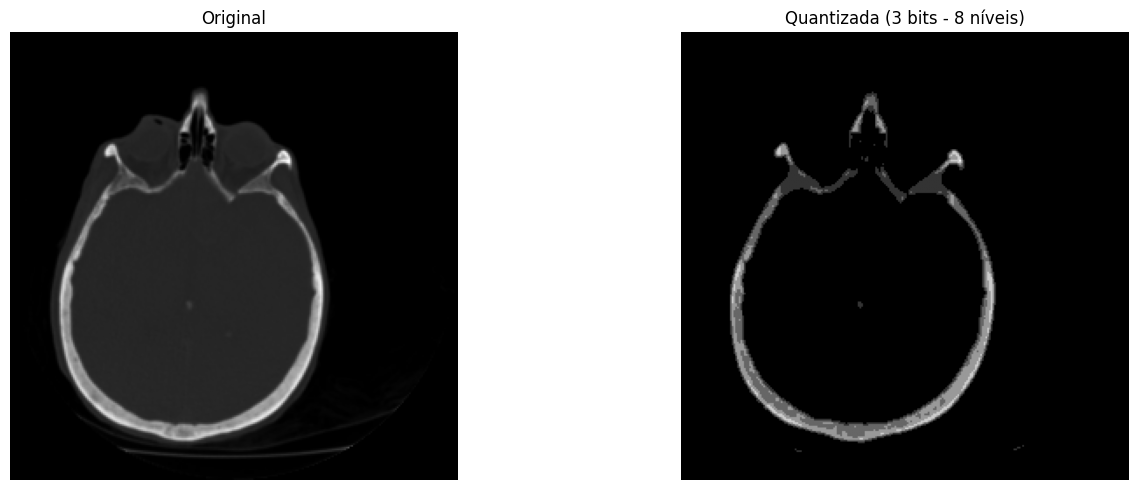

In [ ]:
# --- Tarefa 1.2: Resolution of Intensidade (Quantization) ---
print("\n--- Tarefa 1.2: Resolução de Intensidade ---")
bits_quant = 3
niveis = 2**bits_quant
image_quantizada_3bit = np.floor(image_float_g * (niveis - 1)) / (niveis - 1)
image_quantizada_3bit = np.clip(image_quantizada_3bit, 0, 1)

plot_images([image_float_g, image_quantizada_3bit],
            ["Original", f"Quantizada ({bits_quant} bits - {niveis} níveis)"],
            cmaps=['gray', 'gray'])

Modifications and Perguntas (Tarefa 1.2):

1. Altere bits_quant to 2 (4 levels) and after to 1 (2 levels - image binary).
2. What is o "falso contour"? at which situation ele se torna more aparente and por what?
3. Quantos bits você acha that are necessary to a representation visualmente acceptable of this image medical specific, without perda significativa of information diagnostic (considerando only a perception visual)?


--- Tarefa 1.3: Distâncias entre Pixels ---
Pixel p1: (108, 118), Pixel p2: (143, 133)
Distância D4 (City-Block) entre p1 e p2: 50
Distância D8 (Chessboard) entre p1 e p2: 35


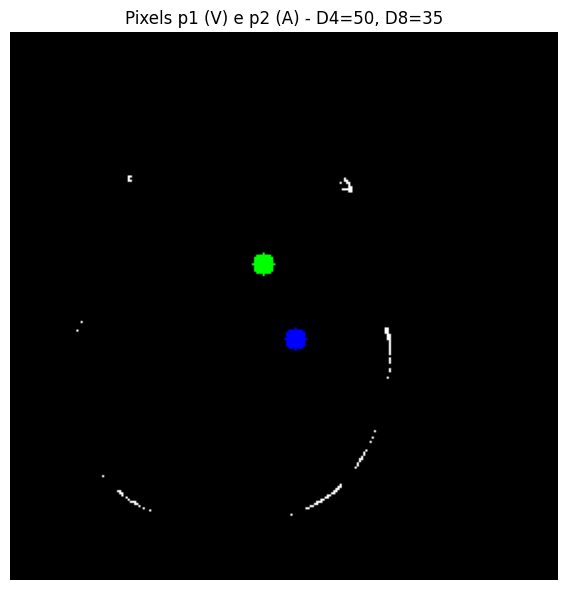

In [ ]:
# --- Tarefa 1.3: Distances between Pixels ---
print("\n--- Tarefa 1.3: Distâncias entre Pixels ---")
limiar = 0.6
img_binaria_dist = image_float_g > limiar

p1 = (M_g//2 - 20, N_g//2 - 10)
p2 = (M_g//2 + 15, N_g//2 + 5)

dist_d4 = abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])
dist_d8 = max(abs(p1[0] - p2[0]), abs(p1[1] - p2[1]))

print(f"Pixel p1: {p1}, Pixel p2: {p2}")
print(f"Distância D4 (City-Block) entre p1 e p2: {dist_d4}")
print(f"Distância D8 (Chessboard) entre p1 e p2: {dist_d8}")

img_com_pontos = img_as_ubyte(img_binaria_dist.copy())
cv2_img_com_pontos = cv2.cvtColor(img_com_pontos, cv2.COLOR_GRAY2BGR)
cv2.circle(cv2_img_com_pontos, (p1[1], p1[0]), 5, (0,255,0), -1) # p1 green
cv2.circle(cv2_img_com_pontos, (p2[1], p2[0]), 5, (0,0,255), -1) # p2 blue

plot_images([cv2_img_com_pontos], [f"Pixels p1 (V) e p2 (A) - D4={dist_d4}, D8={dist_d8}"],
            figsize=(6,6)) # cmap not necessário to image BGR

Modifications and Perguntas (Tarefa 1.3):

1. Escolha two pixels different p1_novo and p2_novo in the image img_binaria_dist.
2. Recalcule and imprima the distances D_4 and D_8 to their novos pixels.
3. at that situations practices a escolha between D_4 and D_8 can be importsnte?

Bloco 2: Realce in the Domain Espacial - Transformations of Intensidade and Histogramas (Cap. 3)

Conceito: Transformations of Intensidade Pontuais.


--- Tarefa 2.1: Negativo da Imagem ---

--- Tarefa 2.2: Transformação Gama ---


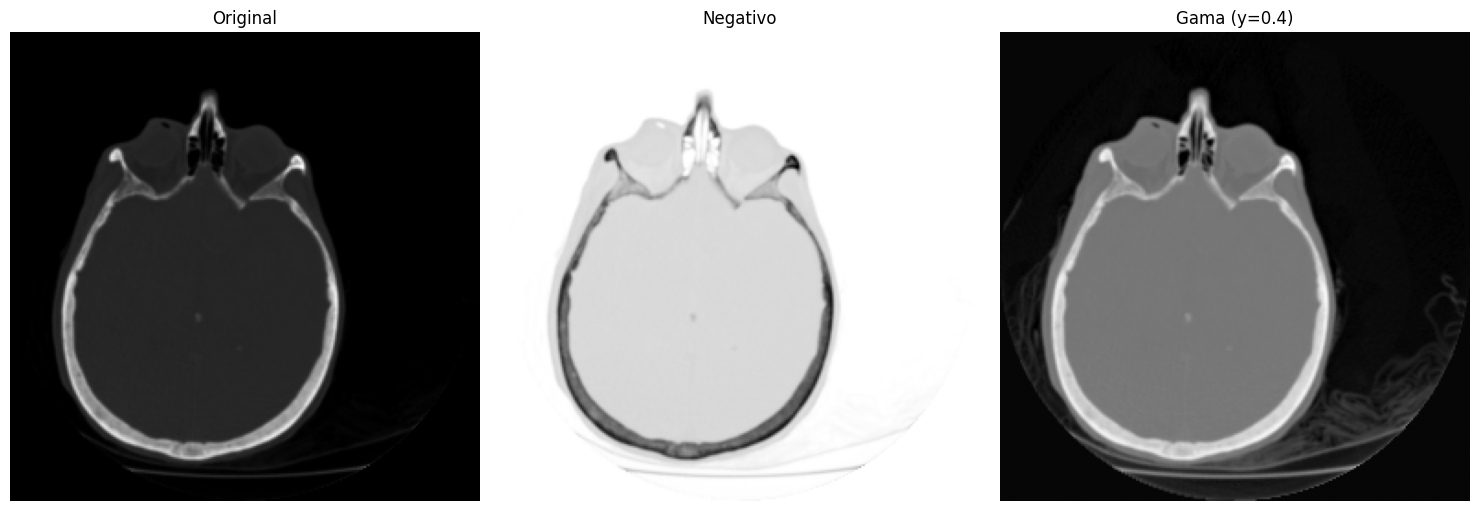

In [ ]:
# --- Tarefa 2.1: Negativo of the Image ---
print("\n--- Tarefa 2.1: Negativo da Imagem ---")
img_negativo = 1.0 - image_float_g

# --- Tarefa 2.2: Transformation Gama ---
print("\n--- Tarefa 2.2: Transformação Gama ---")
gamma_val = 0.4
img_gama = image_float_g ** gamma_val
img_gama = exposure.rescale_intensity(img_gama, out_range=(0,1))

plot_images([image_float_g, img_negativo, img_gama],
            ["Original", "Negativo", f"Gama (y={gamma_val})"],
            cmaps=['gray', 'gray', 'gray'])

Modifications and Perguntas (Tarefa 2.1 and 2.2):

1. Negativo: at that type of image medical o negativo poderia ajudar in the visualization? Por what?
2. Gama: Teste
gamma=0.2, 0.6, 1.0, 1.5, 2.5. What acontece with o contraste at regions escuras/claras? Which
gamma enhances melhor the estruturas internas of the brain?

Conceito: Processing por Histograma.


--- Tarefa 2.3: Equalização de Histograma ---


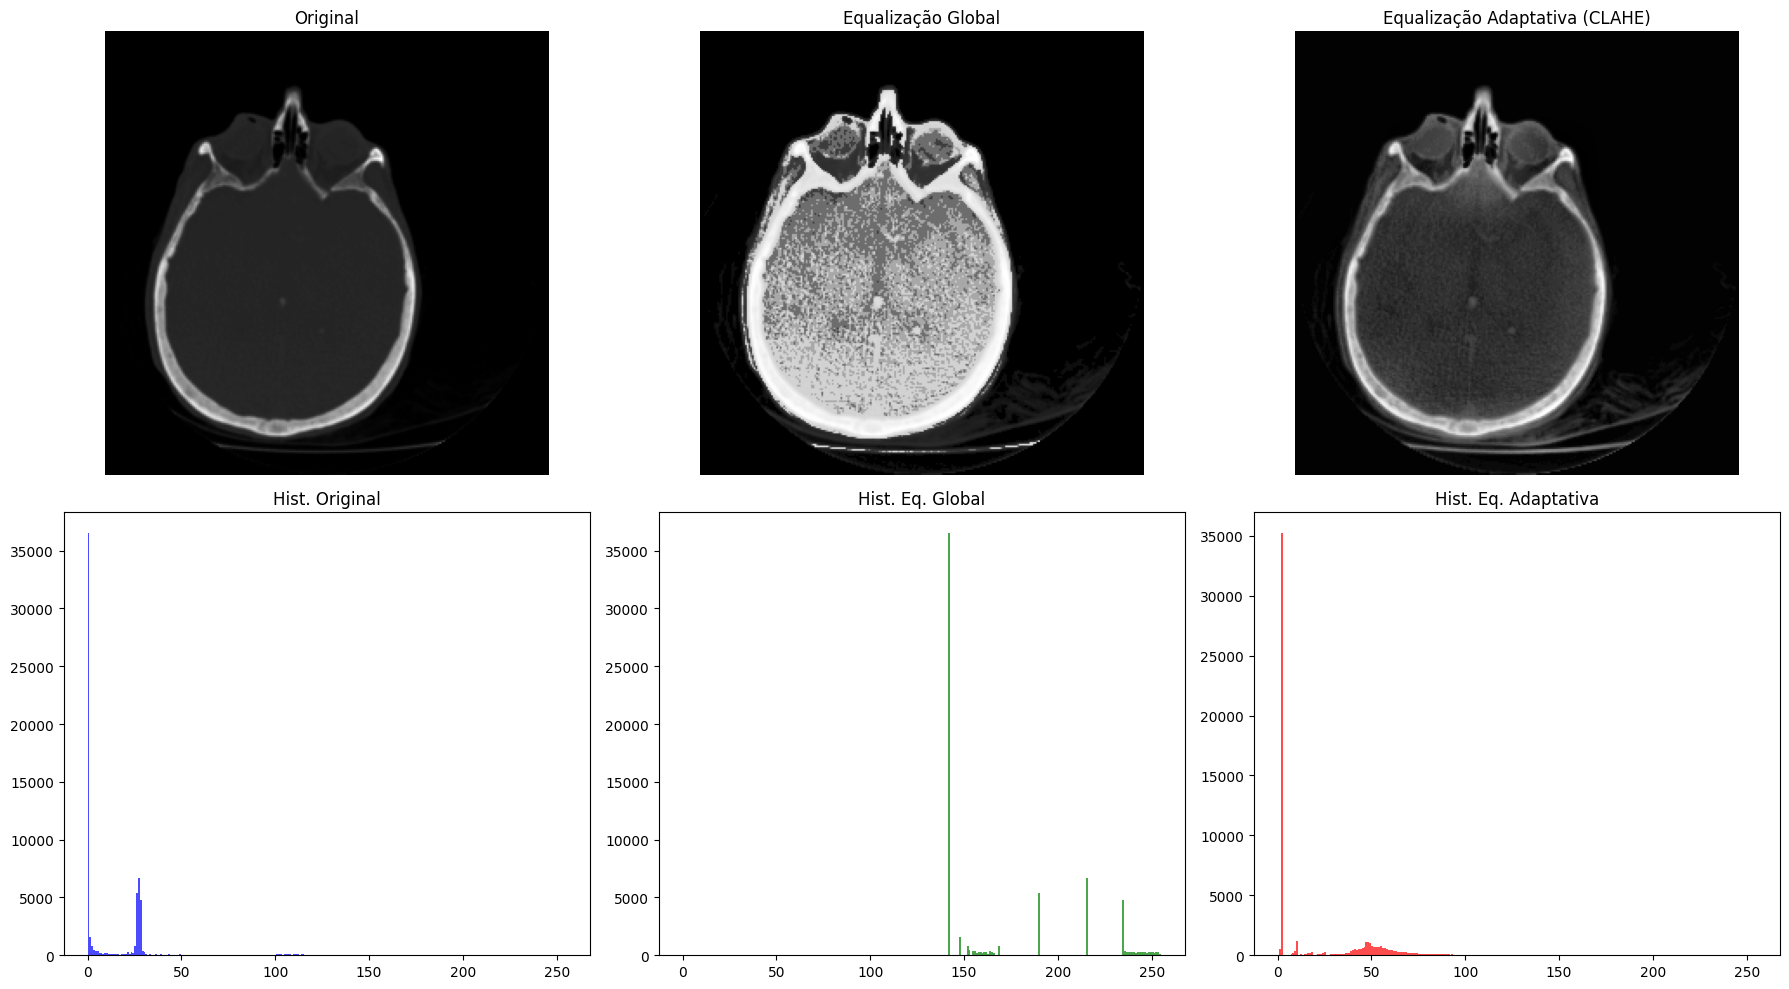

In [ ]:
# --- Tarefa 2.3: Ewhichizaction of Histograma ---
print("\n--- Tarefa 2.3: Equalização de Histograma ---")
img_original_ubyte_hist = image_ubyte_g
img_eq_global = exposure.equalize_hist(img_original_ubyte_hist)
img_eq_adaptativo = exposure.equalize_adapthist(image_float_g, clip_limit=0.03)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes_flat = axes.ravel()
axes_flat[0].imshow(img_original_ubyte_hist, cmap='gray'); axes_flat[0].set_title('Original'); axes_flat[0].axis('off')
axes_flat[3].hist(img_original_ubyte_hist.ravel(), bins=256, range=(0,255), color='blue', alpha=0.7); axes_flat[3].set_title('Hist. Original')

axes_flat[1].imshow(img_eq_global, cmap='gray'); axes_flat[1].set_title('Equalização Global'); axes_flat[1].axis('off')
axes_flat[4].hist(img_as_ubyte(img_eq_global).ravel(), bins=256, range=(0,255), color='green', alpha=0.7); axes_flat[4].set_title('Hist. Eq. Global')

axes_flat[2].imshow(img_eq_adaptativo, cmap='gray'); axes_flat[2].set_title('Equalização Adaptativa (CLAHE)'); axes_flat[2].axis('off')
axes_flat[5].hist(img_as_ubyte(img_eq_adaptativo).ravel(), bins=256, range=(0,255), color='red', alpha=0.7); axes_flat[5].set_title('Hist. Eq. Adaptativa')

plt.tight_layout()
plt.show()

Modifications and Perguntas (Tarefa 2.3):

1. the o histograma of the image with ewhichizaction global se difere of the original? Ele is "plano"?
2. Compare a ewhichizaction global with CLAHE. Which enhances melhor detalhes locais?
3. at `exposure.ewhichize_adapthist`, altere `clip_limit` to `0.01` and `0.05`. What este tometer controla?

Bloco 3: Realce in the Domain Espacial - Filtragem Espacial (Cap. 3)



Conceito: Filters of Smoothing.


--- Tarefa 3.1: Filtros de Média e Gaussiano ---


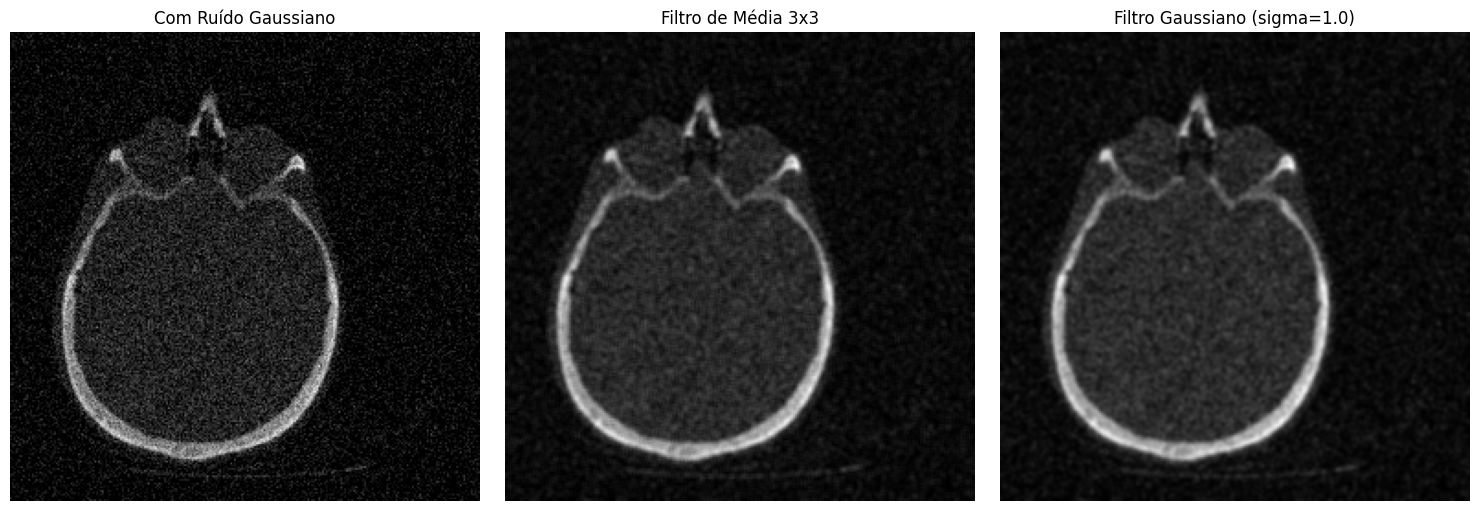

In [ ]:
# --- Tarefa 3.1: Filters of Average and Gaussiano ---
print("\n--- Tarefa 3.1: Filtros de Média e Gaussiano ---")
img_ruidosa_gauss = util.random_noise(image_float_g, mode='gaussian', var=0.005)
filtro_media_3x3 = ndimage.uniform_filter(img_ruidosa_gauss, size=3)
sigma_gauss_1 = 1.0
filtro_gauss_s1 = ndimage.gaussian_filter(img_ruidosa_gauss, sigma=sigma_gauss_1)

plot_images([img_ruidosa_gauss, filtro_media_3x3, filtro_gauss_s1],
            ["Com Ruído Gaussiano", "Filtro de Média 3x3", f"Filtro Gaussiano (sigma={sigma_gauss_1})"],
            cmaps=['gray', 'gray', 'gray'])

Modifications and Perguntas (Tarefa 3.1):

1. Altere o `size` of the `uniform_filter` to `7`. What acontece?
2. Altere o `sigma` of the `gaussian_filter` to `3.0`. Compare with o filter of average 7x7. Which preserva melhor the edges?
3. O Gaussian filter is geralmente preferable to the of average?


--- Tarefa 3.2: Filtro de Mediana ---


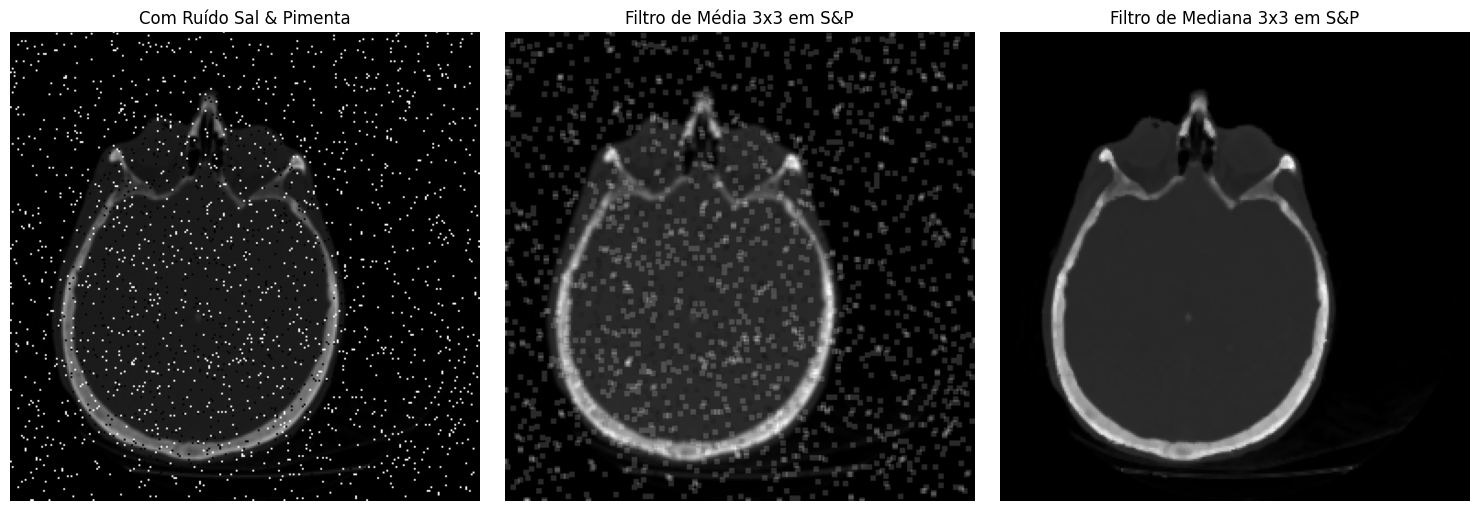

In [ ]:
# --- Tarefa 3.2: Filter of Mediana ---
print("\n--- Tarefa 3.2: Filtro de Mediana ---")
img_ruidosa_sp = util.random_noise(image_float_g, mode='s&p', amount=0.05)
filtro_mediana_3x3 = ndimage.median_filter(img_ruidosa_sp, size=3)
filtro_media_para_sp = ndimage.uniform_filter(img_ruidosa_sp, size=3)

plot_images([img_ruidosa_sp, filtro_media_para_sp, filtro_mediana_3x3],
            ["Com Ruído Sal & Pimenta", "Filtro de Média 3x3 em S&P", "Filtro de Mediana 3x3 em S&P"],
            cmaps=['gray', 'gray', 'gray'])

Modifications and Perguntas (Tarefa 3.2):

1. Which filter (average or mediana) foi more eficaz in the noise "sal and pimenta"? Por what?
2. Aumente amount of the noise 's&amp;p' to `0.15`. the filters still are eficazes? Aumente o `size` of the mediana to `5`. Melhora?

Conceito: Filters of Sharpening.


--- Tarefa 3.3: Realce com Laplaciano ---

--- Tarefa 3.4: Unsharp Masking ---


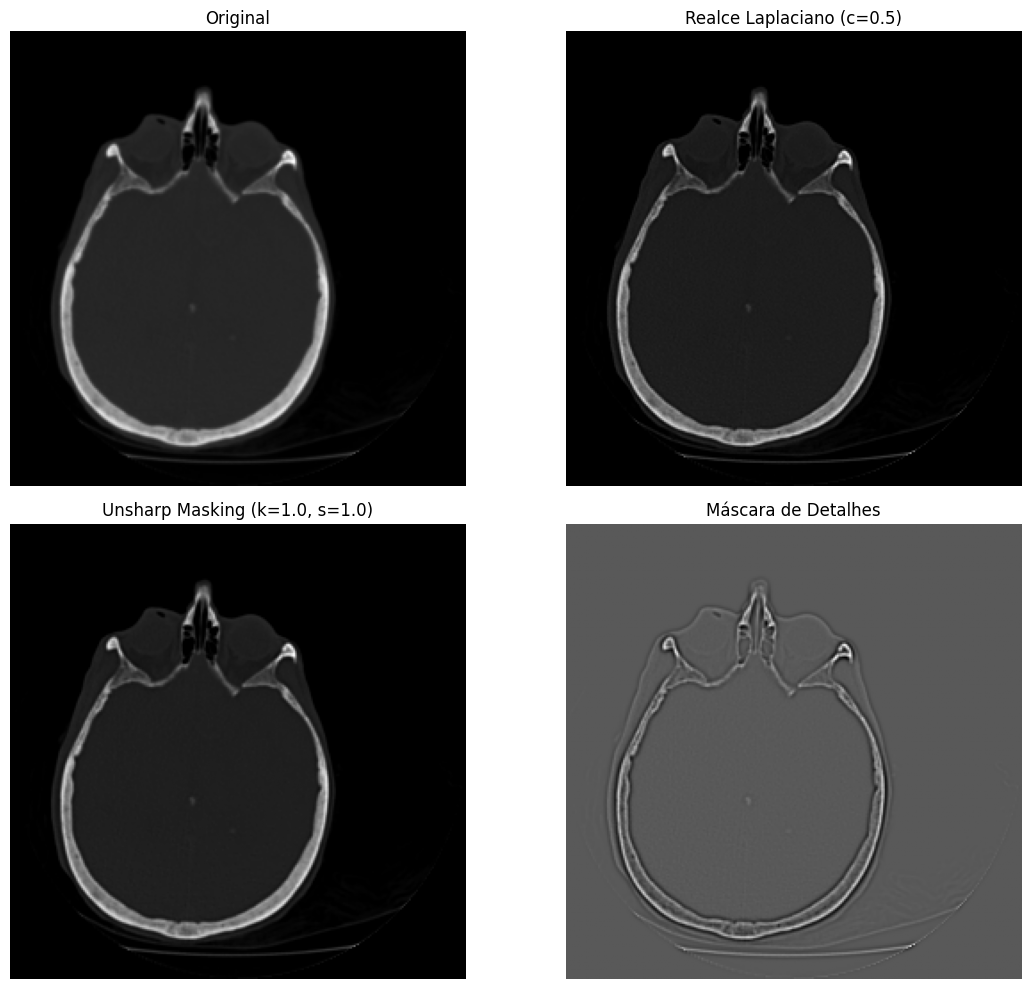

In [ ]:
# --- Tarefa 3.3: Realce with Laplaciano ---
print("\n--- Tarefa 3.3: Realce com Laplaciano ---")
img_para_laplaciano = image_float_g
laplaciano = ndimage.laplace(img_para_laplaciano)
fator_c_laplace = 0.5
img_realcada_laplace = np.clip(img_para_laplaciano - fator_c_laplace * laplaciano, 0, 1)

# --- Tarefa 3.4: Unsharp Masking (Manual Simplificado) ---
print("\n--- Tarefa 3.4: Unsharp Masking ---")
sigma_unsharp = 1.0
img_suavizada_unsharp = ndimage.gaussian_filter(image_float_g, sigma=sigma_unsharp)
mascara_detalhes = image_float_g - img_suavizada_unsharp
k_fator_unsharp = 1.0
img_unsharp_masked = np.clip(image_float_g + k_fator_unsharp * mascara_detalhes, 0, 1)

plot_images([image_float_g, img_realcada_laplace, img_unsharp_masked, mascara_detalhes],
            ["Original", f"Realce Laplaciano (c={fator_c_laplace})", f"Unsharp Masking (k={k_fator_unsharp}, s={sigma_unsharp})", "Máscara de Detalhes"],
            rows=2, cmaps=['gray', 'gray', 'gray', 'gray'], figsize=(12,10))

Modifications and Perguntas (Tarefa 3.3 and 3.4):

1. Laplaciano: Altere `fator_c_laplace` to `0.2` and `1.0`. Efeitos? and se somar o Laplaciano?
2. Unsharp Masking: Altere `sigma_unsharp` to `0.5` and `3.0`. Efeitos? Altere `k_fator_unsharp` to `0.5` and `2.0` (Highboost). Efeitos?

Bloco 4: Realce in the Domain of the Frequency (Cap. 4)

Conceito: DFT 2D and Visualization of the Espectro.


--- Tarefa 4.1: DFT 2D e Espectro ---


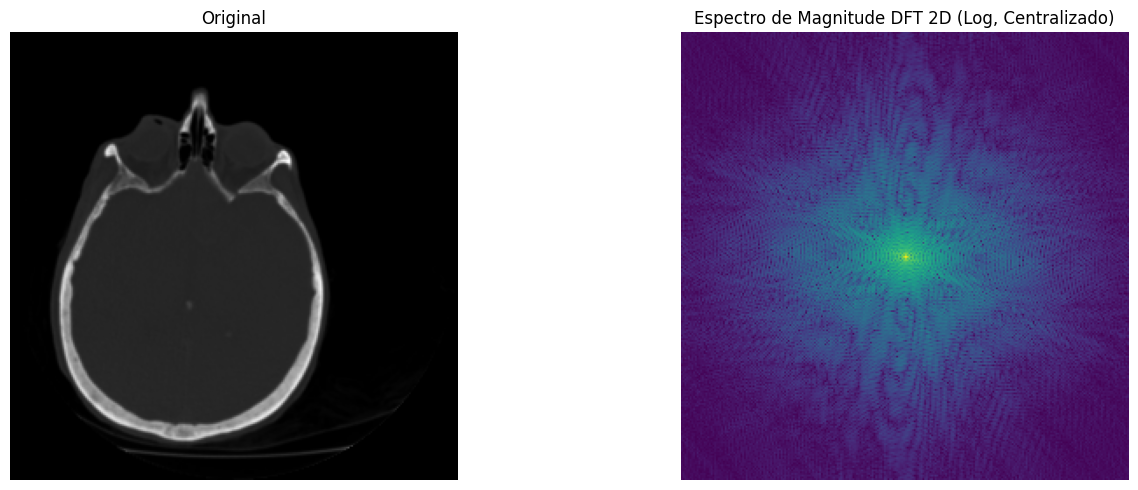

In [ ]:
# --- Tarefa 4.1: DFT 2D and Espectro ---
print("\n--- Tarefa 4.1: DFT 2D e Espectro ---")
F_imagem_g = fft2(image_float_g)
F_imagem_shifted_g = fftshift(F_imagem_g)
espectro_mag_log_g = np.log1p(np.abs(F_imagem_shifted_g))

plot_images([image_float_g, espectro_mag_log_g],
            ["Original", "Espectro de Magnitude DFT 2D (Log, Centralizado)"],
            cmaps=['gray', 'viridis'])

Modifications and Perguntas (Tarefa 4.1):

1. Where is a componente DC? What representa? Where are baixas/altas frequencies? there is direcionalidade in the espectro?

Conceito: Filtragem Passa-Baixas in the Domain of the Frequency.


--- Tarefa 4.2: Filtro Gaussiano Passa-Baixas (GLPF) ---


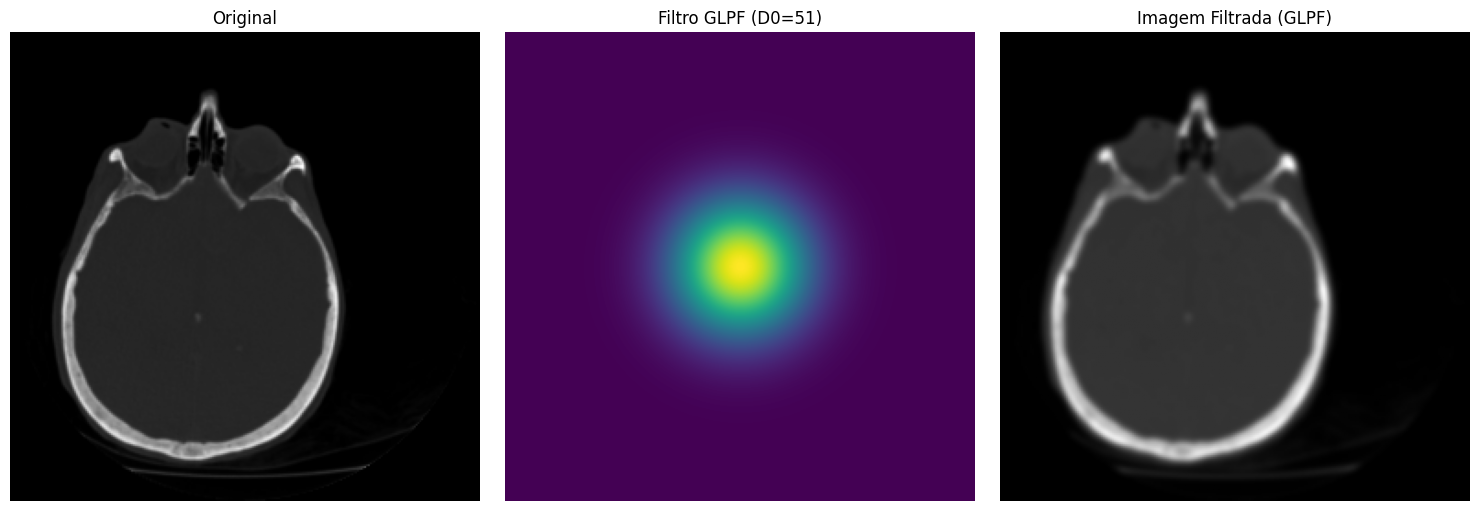

In [ ]:
# --- Tarefa 4.2: Gaussian filter Passa-Baixas (GLPF) ---
print("\n--- Tarefa 4.2: Filtro Gaussiano Passa-Baixas (GLPF) ---")
P_filt, Q_filt = 2*M_g, 2*N_g # Padding
fp_g = np.zeros((P_filt, Q_filt), dtype=float)
fp_g[0:M_g, 0:N_g] = image_float_g
Fp_g_centralizada = fftshift(fft2(fp_g))

idx_P = np.fft.fftshift(np.fft.fftfreq(P_filt) * P_filt)
idx_Q = np.fft.fftshift(np.fft.fftfreq(Q_filt) * Q_filt)
VV_g, UU_g = np.meshgrid(idx_Q, idx_P)
D_sq_g = UU_g**2 + VV_g**2

D0_glpf = P_filt * 0.1
H_glpf_g = np.exp(-D_sq_g / (2 * (D0_glpf**2 + 1e-6)))
G_glpf_g = H_glpf_g * Fp_g_centralizada

def idft_process_extract_geral(G_centralizado, P_img, Q_img, M_orig, N_orig): # Redefinindo localmente
    img_padded_spatial = ifft2(ifftshift(G_centralizado)).real
    img_final = img_padded_spatial[0:M_orig, 0:N_orig]
    return exposure.rescale_intensity(img_final, out_range=(0,1))

img_filtrada_glpf_g = idft_process_extract_geral(G_glpf_g, P_filt, Q_filt, M_g, N_g)

plot_images([image_float_g, H_glpf_g, img_filtrada_glpf_g],
            ["Original", f"Filtro GLPF (D0={D0_glpf:.0f})", "Imagem Filtrada (GLPF)"],
            cmaps=['gray', 'viridis', 'gray'])

Modifications and Perguntas (Tarefa 4.2):

1. Altere `D0_glpf` to `P_filt * 0.03` and `P_filt * 0.25`. Efeitos in the image and in the filter H(u,v)?
2. Compare o efeito of the GLPF (frequency) with o Gaussiano espacial (Tarefa 3.1).

Conceito: Filtragem Passa-Altas in the Domain of the Frequency.


--- Tarefa 4.3: Filtro Gaussiano Passa-Altas (GHPF) ---


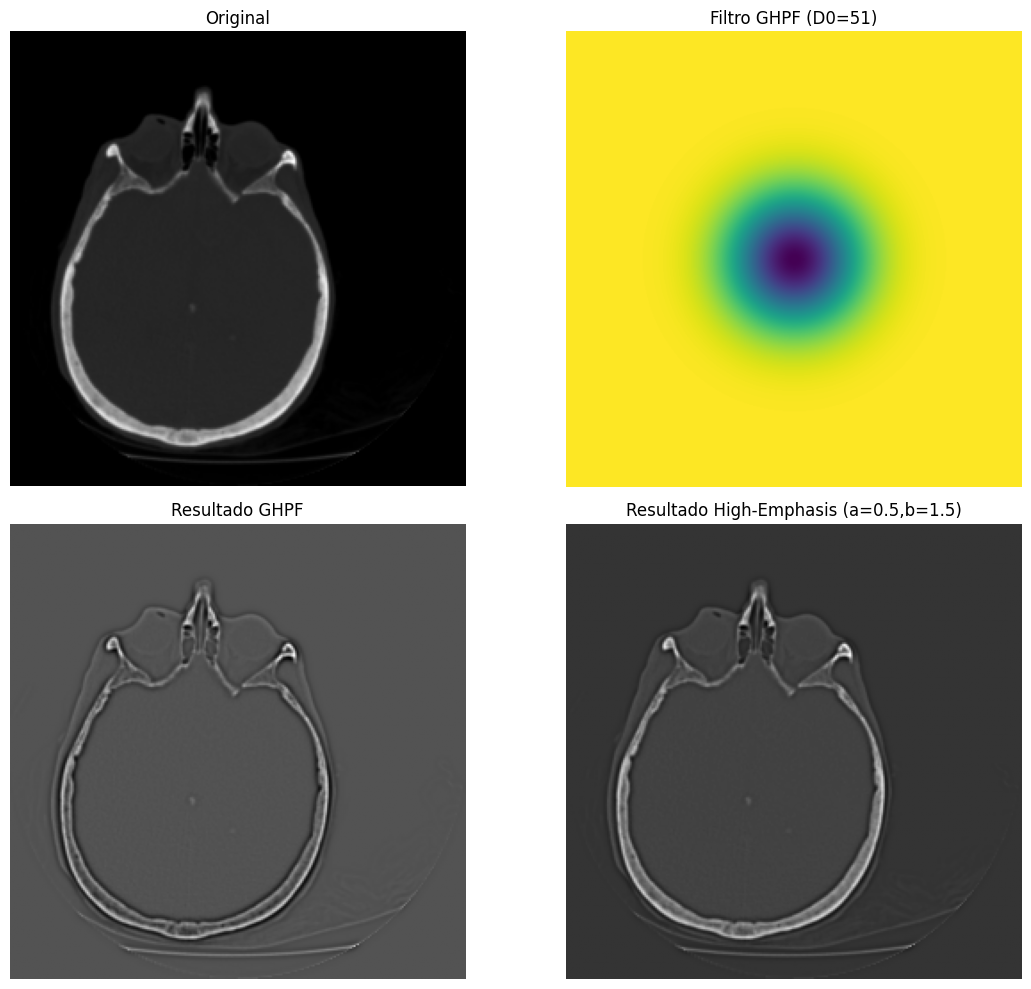

In [ ]:
# --- Tarefa 4.3: Gaussian filter Passa-Altas (GHPF) ---
print("\n--- Tarefa 4.3: Filtro Gaussiano Passa-Altas (GHPF) ---")
D0_ghpf = P_filt * 0.1
H_glpf_base = np.exp(-D_sq_g / (2 * (D0_ghpf**2 + 1e-6)))
H_ghpf_g = 1 - H_glpf_base
G_ghpf_g = H_ghpf_g * Fp_g_centralizada
img_filtrada_ghpf_g = idft_process_extract_geral(G_ghpf_g, P_filt, Q_filt, M_g, N_g)

a_hef = 0.5; b_hef = 1.5
H_hef_g = a_hef + b_hef * H_ghpf_g
G_hef_g = H_hef_g * Fp_g_centralizada
img_filtrada_hef_g = idft_process_extract_geral(G_hef_g, P_filt, Q_filt, M_g, N_g)

plot_images([image_float_g, H_ghpf_g, img_filtrada_ghpf_g, img_filtrada_hef_g],
            ["Original", f"Filtro GHPF (D0={D0_ghpf:.0f})", "Resultado GHPF", f"Resultado High-Emphasis (a={a_hef},b={b_hef})"],
            rows=2, cmaps=['gray', 'viridis', 'gray', 'gray'], figsize=(12,10))

Modifications and Perguntas (Tarefa 4.3):

1. A image `img_filtrada_ghpf_g` parece escura? Por what?
2. Compare `img_filtrada_ghpf_g` with `img_filtrada_hef_g`. Which is melhor to enhance detalhes without perder brilho? Por that `a_hef` and `b_hef` ajudam?
3. Altere `D0_ghpf`. the afeta o sharpening?